# Lesson 6 Assignment - Video Store Data Analysis

## Author - Mike Pearson

### Background
Consider the data collected by a hypothetical video store for 50 regular customers.

This data consists of a table which, for each customer, records the following attributes:
* Gender
* Income
* Age
* Rentals - Total number of video rentals in the past year
* Avg. per visit - Average number of video rentals per visit during the past year
* Incidentals - Whether the customer tends to buy incidental items such as refreshments when renting a video
* Genre - The customer's preferred movie genre

## Tasks
Use the provided Video_Store.csv file, perform each of the following data preparation tasks and answer the related questions:

a) Split the age attribute into bins, using a bin depth of 4.

b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0] and save results in new column. You'll need the income column again. 

c) Use z-score normalization to standardize the values of the Rentals attribute.

d) Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K and keep in a separate column. Later you will compare which method has better results. 

e) Create a list of your categorical values so that you can encode them. 

f) On your categorical values, encode them and then perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You will need to construct a complete Correlation Matrix (Please read the brief document <a href="https://library.startlearninglabs.uw.edu/DATASCI420/PDF/DATASCI%20420%20Basic%20Correlation%20Analysis.pdf">Basic Correlation Analysis</a> for more detail). *Can you observe any "significant" patterns among groups of two or more variables? Explain.*

g) Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). *What patterns do you see? Explain.*

**Note:** To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.

h) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished? (e.g., Should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.


**Hints:**

- Review basic statistics for different attributes by using the pandas functions you learned about

- Consider discretizing the Age attribute.

- Make sure numerical variables are on the same scale

In [3]:

URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Video_Store.csv"


In [4]:
# Import libraries
import pandas as pd
import numpy as np
Video_data = pd.read_csv(URL)
print(Video_data.head())
print(Video_data.describe())

   Cust ID Gender  Income  Age  Rentals  Avg Per Visit Incidentals   Genre
0        1      M   45000   25       27            2.5         Yes  Action
1        2      F   54000   33       12            3.4          No   Drama
2        3      F   32000   20       42            1.6          No  Comedy
3        4      F   59000   70       16            4.2         Yes   Drama
4        5      M   37000   35       25            3.2         Yes  Action
        Cust ID        Income        Age    Rentals  Avg Per Visit
count  50.00000     50.000000  50.000000  50.000000      50.000000
mean   25.50000  42300.000000  31.560000  26.240000       2.748000
std    14.57738  21409.753642  12.000272  10.027635       0.898125
min     1.00000   1000.000000  15.000000   9.000000       1.100000
25%    13.25000  26750.000000  22.000000  19.000000       2.125000
50%    25.50000  41000.000000  30.000000  25.000000       2.750000
75%    37.75000  56750.000000  37.500000  32.750000       3.375000
max    50.0000

## Now let's do some binning

In [5]:
Video_data['Age'].quantile([0.25,0.5,0.75])
age_25 = Video_data['Age'].quantile(0.25)
age_min = np.min(Video_data['Age'])
age_max = np.max(Video_data['Age'])
age_50 = np.median(Video_data['Age'])
age_75 = Video_data['Age'].quantile(0.75)
print("and the min is", age_min, "the first quartile is ", age_25, "the median is", age_50, "the 3rd quartile is", age_75,
      "the max is", age_max)

print(len(Video_data['Age']))
print(Video_data.loc[1, "Age"])
print(Video_data.tail())

and the min is 15 the first quartile is  22.0 the median is 30.0 the 3rd quartile is 37.5 the max is 70
50
33
    Cust ID Gender  Income  Age  Rentals  Avg Per Visit Incidentals   Genre
45       46      F   57000   43        9            1.1          No   Drama
46       47      F   69000   35       22            2.8         Yes   Drama
47       48      F   52000   47       14            1.6          No   Drama
48       49      M   31000   25       42            3.4         Yes  Action
49       50      M   24000   20       33            4.7          No  Action


In [6]:
bob = len(Video_data["Age"])
for i in range(bob):
    if Video_data.loc[i, "Age"] <= age_25 :
        Video_data.loc[i,"binned age"] = 1
    elif Video_data.loc[i, "Age"] <= age_50 :
        Video_data.loc[i,"binned age"] = 2
    elif Video_data.loc[i, "Age"] <= age_75 :
        Video_data.loc[i,"binned age"] = 3
    else :
        Video_data.loc[i,"binned age"] = 4

print(Video_data.tail())
    
    

    Cust ID Gender  Income  Age  Rentals  Avg Per Visit Incidentals   Genre  \
45       46      F   57000   43        9            1.1          No   Drama   
46       47      F   69000   35       22            2.8         Yes   Drama   
47       48      F   52000   47       14            1.6          No   Drama   
48       49      M   31000   25       42            3.4         Yes  Action   
49       50      M   24000   20       33            4.7          No  Action   

    binned age  
45         4.0  
46         3.0  
47         4.0  
48         2.0  
49         1.0  


## Now for the min-max normalization of Income

In [7]:
min_income = np.min(Video_data['Income'])
max_income = np.max(Video_data['Income'])
range_income = max_income - min_income
Video_data['normed income']= (Video_data['Income'] - min_income)/range_income
print(Video_data.describe())

        Cust ID        Income        Age    Rentals  Avg Per Visit  \
count  50.00000     50.000000  50.000000  50.000000      50.000000   
mean   25.50000  42300.000000  31.560000  26.240000       2.748000   
std    14.57738  21409.753642  12.000272  10.027635       0.898125   
min     1.00000   1000.000000  15.000000   9.000000       1.100000   
25%    13.25000  26750.000000  22.000000  19.000000       2.125000   
50%    25.50000  41000.000000  30.000000  25.000000       2.750000   
75%    37.75000  56750.000000  37.500000  32.750000       3.375000   
max    50.00000  89000.000000  70.000000  48.000000       4.700000   

       binned age  normed income  
count   50.000000      50.000000  
mean     2.460000       0.469318  
std      1.164264       0.243293  
min      1.000000       0.000000  
25%      1.000000       0.292614  
50%      2.000000       0.454545  
75%      3.750000       0.633523  
max      4.000000       1.000000  


## And the z-score normalization of Rentals

In [8]:
rental_mean = np.mean(Video_data['Rentals'])
rental_std =np.std(Video_data["Rentals"])
Video_data['z-normed rentals'] = (Video_data['Rentals'] - rental_mean)/rental_std
print(Video_data.describe())

        Cust ID        Income        Age    Rentals  Avg Per Visit  \
count  50.00000     50.000000  50.000000  50.000000      50.000000   
mean   25.50000  42300.000000  31.560000  26.240000       2.748000   
std    14.57738  21409.753642  12.000272  10.027635       0.898125   
min     1.00000   1000.000000  15.000000   9.000000       1.100000   
25%    13.25000  26750.000000  22.000000  19.000000       2.125000   
50%    25.50000  41000.000000  30.000000  25.000000       2.750000   
75%    37.75000  56750.000000  37.500000  32.750000       3.375000   
max    50.00000  89000.000000  70.000000  48.000000       4.700000   

       binned age  normed income  z-normed rentals  
count   50.000000      50.000000      5.000000e+01  
mean     2.460000       0.469318      1.487699e-16  
std      1.164264       0.243293      1.010153e+00  
min      1.000000       0.000000     -1.736704e+00  
25%      1.000000       0.292614     -7.293349e-01  
50%      2.000000       0.454545     -1.249137e-01 

## Discretize the Income

High = 60K+; Mid = 25K-59K; Low = less than $25K and keep in a separate column. Later you will compare which method has better results.

In [9]:
blob = len(Video_data["Income"])
for i in range(blob):
    if Video_data.loc[i, "Income"] <= 25000 :
        Video_data.loc[i,"Discrete Income"] = "Low"
    elif Video_data.loc[i, "Income"] <= 59000 :
        Video_data.loc[i,"Discrete Income"] = "Mid"
    else :
        Video_data.loc[i,"Discrete Income"] = "High"


print(Video_data.tail())
Video_data.head()

    Cust ID Gender  Income  Age  Rentals  Avg Per Visit Incidentals   Genre  \
45       46      F   57000   43        9            1.1          No   Drama   
46       47      F   69000   35       22            2.8         Yes   Drama   
47       48      F   52000   47       14            1.6          No   Drama   
48       49      M   31000   25       42            3.4         Yes  Action   
49       50      M   24000   20       33            4.7          No  Action   

    binned age  normed income  z-normed rentals Discrete Income  
45         4.0       0.636364         -1.736704             Mid  
46         3.0       0.772727         -0.427124            High  
47         4.0       0.579545         -1.233019             Mid  
48         2.0       0.340909          1.587613             Mid  
49         1.0       0.261364          0.680981             Low  


,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,binned age,normed income,z-normed rentals,Discrete Income
0,1,M,45000,25,27,2.5,Yes,Action,2.0,0.500000,0.076560,Mid
1,2,F,54000,33,12,3.4,No,Drama,3.0,0.602273,-1.434493,Mid
2,3,F,32000,20,42,1.6,No,Comedy,1.0,0.352273,1.587613,Mid
3,4,F,59000,70,16,4.2,Yes,Drama,4.0,0.659091,-1.031546,Mid
4,5,M,37000,35,25,3.2,Yes,Action,3.0,0.409091,-0.124914,Mid


## Create the list of categorical variables


In [10]:
catz = ["Gender", "Incidentals", "Genre", "binned age", "Discrete Income"]
Video_data.dtypes

Cust ID               int64
Gender               object
Income                int64
Age                   int64
Rentals               int64
Avg Per Visit       float64
Incidentals          object
Genre                object
binned age          float64
normed income       float64
z-normed rentals    float64
Discrete Income      object
dtype: object

In [11]:
wide_Video_data = pd.get_dummies(Video_data, columns = catz)
print(wide_Video_data.describe())

        Cust ID        Income        Age    Rentals  Avg Per Visit  \
count  50.00000     50.000000  50.000000  50.000000      50.000000   
mean   25.50000  42300.000000  31.560000  26.240000       2.748000   
std    14.57738  21409.753642  12.000272  10.027635       0.898125   
min     1.00000   1000.000000  15.000000   9.000000       1.100000   
25%    13.25000  26750.000000  22.000000  19.000000       2.125000   
50%    25.50000  41000.000000  30.000000  25.000000       2.750000   
75%    37.75000  56750.000000  37.500000  32.750000       3.375000   
max    50.00000  89000.000000  70.000000  48.000000       4.700000   

       normed income  z-normed rentals   Gender_F   Gender_M  Incidentals_No  \
count      50.000000      5.000000e+01  50.000000  50.000000       50.000000   
mean        0.469318      1.487699e-16   0.480000   0.520000        0.480000   
std         0.243293      1.010153e+00   0.504672   0.504672        0.504672   
min         0.000000     -1.736704e+00   0.000000

['Cust ID', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'normed income', 'z-normed rentals', 'Gender_F', 'Gender_M', 'Incidentals_No', 'Incidentals_Yes', 'Genre_Action', 'Genre_Comedy', 'Genre_Drama', 'binned age_1.0', 'binned age_2.0', 'binned age_3.0', 'binned age_4.0', 'Discrete Income_High', 'Discrete Income_Low', 'Discrete Income_Mid']


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text xticklabel objects>)

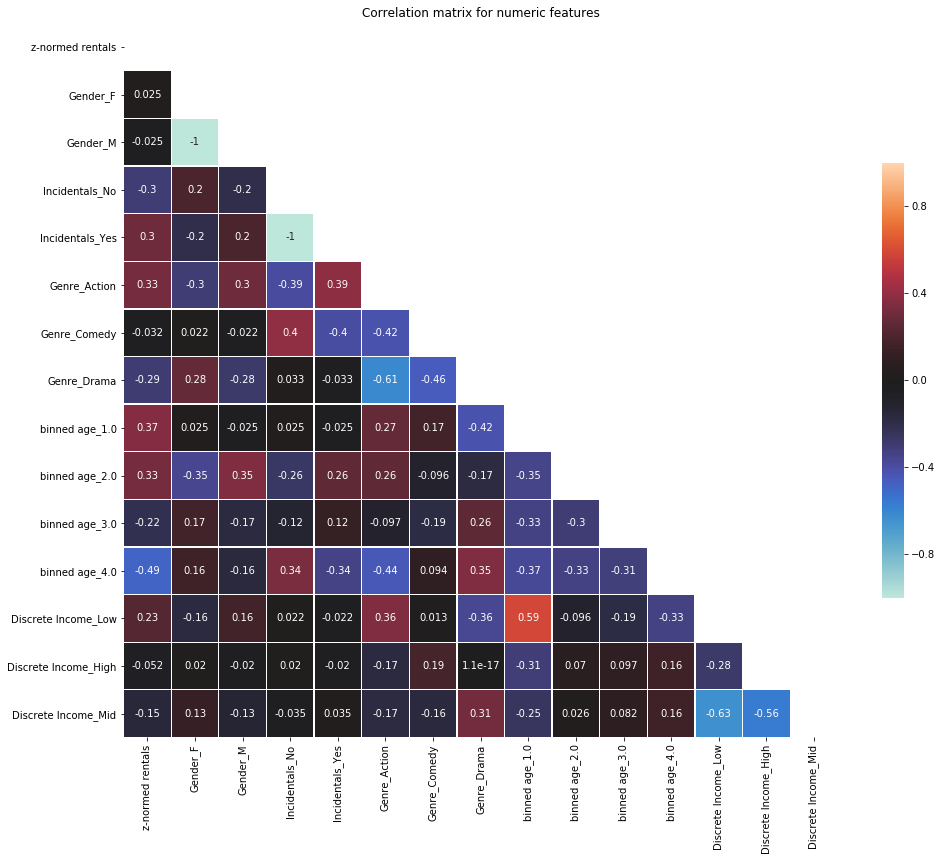

In [33]:
import seaborn as sbn
catz_s = list(wide_Video_data.columns.values)
corr_ed = wide_Video_data[['z-normed rentals', 'Gender_F', 'Gender_M','Incidentals_No'
                           ,'Incidentals_Yes', 'Genre_Action','Genre_Comedy','Genre_Drama', 'binned age_1.0'
                           ,'binned age_2.0','binned age_3.0', 'binned age_4.0', 'Discrete Income_Low'
                           ,'Discrete Income_High', 'Discrete Income_Mid']].corr()
print(catz_s)
##print(corr_ed)
import matplotlib.pyplot as plt
mask = np.zeros_like(corr_ed, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = plt.figure(figsize=(16, 16)).gca() # define axis
sbn.heatmap(corr_ed, vmax=1.0, vmin = -1.0, center=0, annot = True,
            square=True, linewidths=.25, cbar_kws={"shrink": .5}, mask = mask)
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')


## Comments about correlation matrix

There is moderate correlation between the purchase of incidentals and renting the Action Genre (0.39),
And slightly higher correlation between the purchase of incidentals the renting comedy (0.4)
There was a tiny negative correlation between puchases of incidentals and renting drama (-0.033)
a pretty strong negative correlation between renting Action and Drama (-0.61), 
a fairly strong negative correlatoin betwen the youngest age group (age_1.0) and Drama (0.46),
A moderate correlation between the youngest age group and the z-normed rentals (.37)
There was a good correlation between youth (age_1.0) and Low income (0.59).
There was no strong correlatoin with genres at the highest income level.


## Keep only the renters with 30 or more rentals

### Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). What patterns do you see? Explain.

In [40]:
Video_cust_30mo = wide_Video_data.loc[wide_Video_data['Rentals']>=30]
print(Video_cust_30mo.describe())
print(Video_cust_30mo.dtypes)

         Cust ID        Income        Age    Rentals  Avg Per Visit  \
count  18.000000     18.000000  18.000000  18.000000      18.000000   
mean   26.833333  37666.666667  25.166667  37.277778       2.777778   
std    15.049917  23126.251953   8.290675   5.849138       0.927080   
min     3.000000   2000.000000  15.000000  30.000000       1.600000   
25%    15.750000  19500.000000  20.000000  32.250000       2.150000   
50%    26.500000  31500.000000  23.500000  36.500000       2.550000   
75%    39.000000  56000.000000  28.750000  41.750000       3.375000   
max    50.000000  74000.000000  47.000000  48.000000       4.700000   

       normed income  z-normed rentals   Gender_F   Gender_M  Incidentals_No  \
count      18.000000         18.000000  18.000000  18.000000       18.000000   
mean        0.416667          1.111911   0.555556   0.444444        0.444444   
std         0.262798          0.589224   0.511310   0.511310        0.511310   
min         0.011364          0.378771  

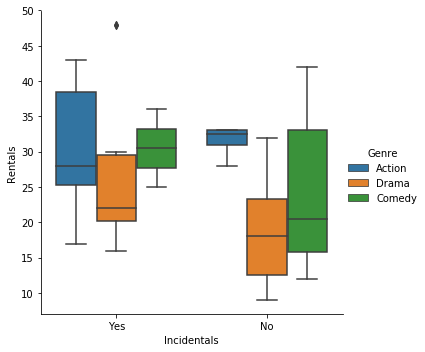

In [44]:
 g = sbn.catplot(x="Incidentals", y="Rentals", hue="Genre",
...                data=Video_data, kind="box")

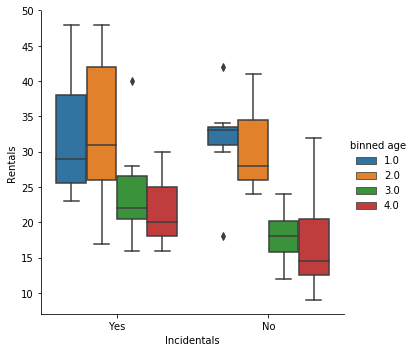

In [49]:
 g = sbn.catplot(x="Incidentals", y="Rentals", hue="binned age",
...                data=Video_data, kind="box")

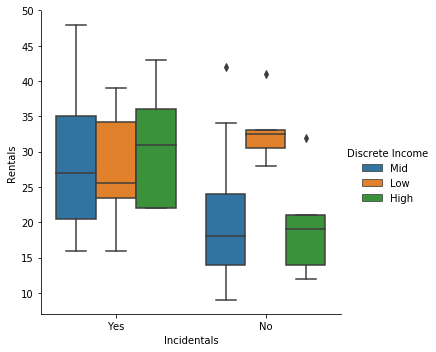

In [53]:
 g = sbn.catplot(x="Incidentals", y="Rentals", hue="Discrete Income",
...                data=Video_data, kind="box")

## To increase sales of incidentals

Target renters of comedy and action movies, in the 30 and under age group.